### NumPy simulation of the standard error on the mean

##### Arnab Dey Sarkar

##### ***General***

Suppose we have a big population $\Omega$ and we are interested on studying about the mean $\mu$ of the population. For that, we drew a sample $\omega$ and we are calculating the sample mean $\bar x$. Now the question is "Is sample mean a good estimate of population mean?"

In lectures what we have seen in an example last week amd this week, can be mathematically represented as 
$$E(\bar x)=\mu \text{ and } Var(\bar x)=\frac{\sigma^2}{n}.$$

Here, $\sigma$ is the population/sample(if population standard deviation is unknown) standard deviation and $$\text{Standard error of mean=SEM:=}\sqrt{\frac{\sigma^2}{n}}=\frac{\sigma}{\sqrt n}.$$
In theory it is true if we have a finite population mean and variance. This is one corollary of weak law of large numbers. This week we saw the example $Var(\bar x)=\frac{\sigma^2}{n}$ again in numpy.

We have also seen in an example last week that if the sample size is large enough then the sample mean $\bar x$ follows Normal distribution with mean $\mu \text{ and variance } \frac{\sigma^2}{n}.$ Theoritically this is one simplified version of Central limit theorem. We need the variables/elements in the population to be "independent and identically distributed random variables(iid rv)."

The important thing to highlight is we are **not** worried about the distribution of **Population or the sample**, our center of attraction is the distribution of **the sample mean**.

##### ***Example in class***

That is why we took a population that follows uniform(0,1) distribution as a population mean then we take $n=5$ samples from there, calculate the sample mean and return the sample in the population and then choose 5 sample again. We keep on doing the process many times say 5000 times. Thus we have a collection of 5000 sample means $\bar x$. Lets name it $A_5=\{\bar x_i \text{: for } i=1(1)5000\}.$ Then we calculated variance in $A_5$. Now we keep on increasing the sample size from $n=5$ to $n=10$ then calculated variance in $A_{10}$. We repeat the process with sample sizes $n in \{20,40,..., 10240\}$ observed that $\frac{\sigma^2}{n} \to 0$ as $n \to \infty$. 

##### ***code***

In [2]:
import numpy as np #importing module

rg=np.random.default_rng(2100) # setting random seed

sample_size=[5*(2**i) for i in range(12)]

# Using numpy and list comprehension to generate std corresponding 
# to increasing sample size
sample_std_vs_sample_size=[rg.random((ns,5000)).mean(axis=0).std(ddof=1) \
    for ns in sample_size]

In [3]:
sample_size

[5, 10, 20, 40, 80, 160, 320, 640, 1280, 2560, 5120, 10240]

In [4]:
sample_std_vs_sample_size

[0.12639977760402196,
 0.09248917058659661,
 0.065073251479999,
 0.0452940285911916,
 0.03206562241809871,
 0.02278191667912868,
 0.016291029330758027,
 0.011515996158164071,
 0.007974553089462759,
 0.005750358904674762,
 0.004012823505979166,
 0.0028040113797993286]

<function matplotlib.pyplot.show(close=None, block=None)>

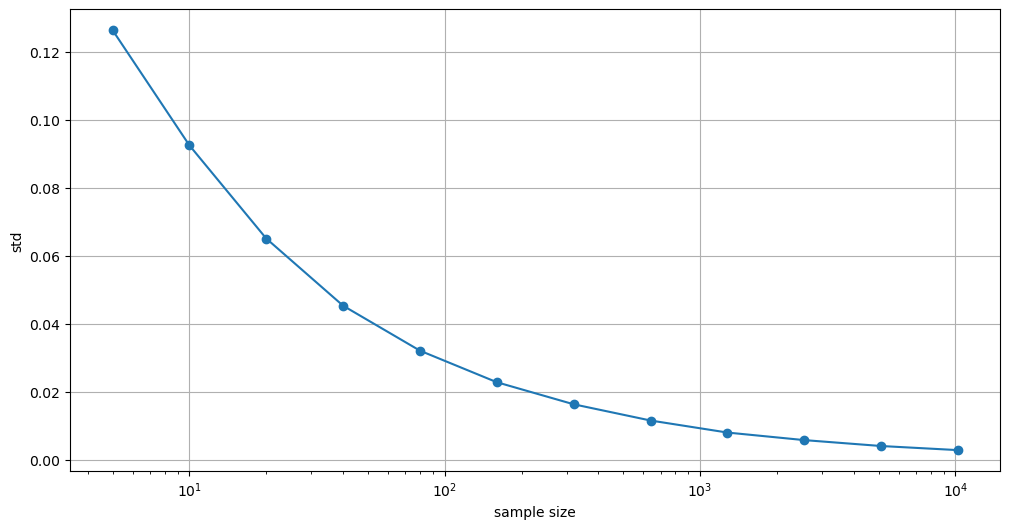

In [5]:
import matplotlib.pyplot as plt

fig,axs=plt.subplots(figsize=(12,6))

axs.set_xscale('log')
axs.plot(sample_size, sample_std_vs_sample_size,'-o')
axs.set_xlabel('sample size')
axs.set_ylabel('std')
axs.grid(True)

plt.show

##### ***Mathematical proof***

I want to give a particular probabilistic/mathematical proof of SEM where the population size is finite.

Suppose a certain population has N members and the values of a variable $X$ for these members are $\mathrm{X}_1, \mathrm{X}_2, \ldots, \mathrm{X}_{\mathrm{N}}$. We select a random sample of $n$ members from this population and denote the value of the variable $\mathrm{X}$ for the $i$ th member of the sample by $x_i, i=1(1) n$. If $\mu$ and $\sigma^2$ be respectively the population mean and population variance, then we have,
$$
\begin{aligned}
& \mu=\frac{1}{N} \sum_{r=1}^N X_r \ldots \ldots \text { (i) } \\
& \sigma^2=\frac{1}{N} \sum_{r=1}^N\left(X_r-\mu\right)^2 \ldots \ldots \text { (ii) }
\end{aligned}
$$
Again, the sample mean $(\bar{x})$ is given by
$$
\bar{x}=\frac{1}{n} \sum_{i=1}^n x_i \ldots \ldots \text { (iii) }
$$

Now, in case of random sampling, we get
$$
\mathrm{E}(\bar{x})=\mathrm{E}\left(\frac{1}{n} \sum_{i=1}^n x_i\right)=\frac{1}{n} \mathrm{E}\left(\sum_{i=1}^n x_i\right)=\frac{1}{n} \sum_{i=1}^n \mathrm{E}\left(x_i\right) \ldots \ldots \text { (iv) }
$$
Further,
$$
\operatorname{var}(\bar{x})=\frac{1}{n^2} \operatorname{var}\left(\sum_{i=1}^n x_i\right)=\frac{1}{n^2}\left\{\sum_{i=1}^n \operatorname{var}\left(x_i\right)+\sum_{\substack{i=1 \\ i \neq j}}^n \sum_{\substack{j=1 \\ i \neq j}}^n \operatorname{cov}\left(x_i, x_j\right)\right\} \ldots \ldots \text { (v) }
$$
Here,
$\mathrm{P}\left(x_i=\mathrm{X}_r\right)=$ probability that the $r$-th member of the population is chosen at $i$ th drawing
$=\frac{\mathrm{l}}{\mathrm{N}}$, for each $i$ and $r$.
Hence,
$$
\begin{aligned}
\mathrm{E}\left(x_i\right) & =\sum_{r=1}^N \mathrm{X}_r \mathrm{P}\left(x_i=\mathrm{X}_r\right)=\sum_{r=1}^N \mathrm{X}_r \frac{1}{\mathrm{~N}}=\frac{1}{\mathrm{~N}} \sum_{r=1}^N \mathrm{X}_r \\
& =\mu, \text { for each } i \ldots \ldots \text { (vi) }
\end{aligned}
$$
$\therefore \quad$ From (iv) and (vi), we have,
$$
\mathrm{E}(\bar{x})=\frac{1}{n} \sum_{\mathrm{i}=1}^{\mathrm{n}} \mu=\mu \ldots \ldots \text { (vii) }
$$
Again,
$$
\begin{aligned}
\operatorname{var}\left(x_i\right) & =\mathrm{E}\left(x_i-\mu\right)^2=\sum_{r=1}^N\left(\mathrm{X}_r-\mu\right)^2 \mathrm{P}\left(x_i=\mathrm{X}_r\right) \\
& =\frac{1}{\mathrm{~N}} \sum_{r=1}^{\mathrm{N}}\left(\mathrm{X}_r-\mu\right)^2=\sigma^2, \text { for each } i \ldots \ldots \text { (viii) }
\end{aligned}
$$
Now, for $i \neq j$,
$\operatorname{cov}\left(x_i, x_j\right)=0$, since $x_i$ and $x_j$ are independent.$\ldots \ldots \text { (ix) }$

Combining (v), (viii) and (ix) we get
$$
\operatorname{var}(\bar{x})=\frac{1}{n^2}\left\{\sum_{i=1}^n \sigma^2+\sum_{i=1}^n \sum_{\substack{j=1 \\ i \neq j}}^n 0\right\}=n \sigma^2 / n^2=\sigma^2 / n,
$$
so that,
$$
\text { S.E. }(\bar{x})=\sqrt{\operatorname{var}(\bar{x})}=\sigma / \sqrt{n}
$$

##### ***Conclusion***

I will ask two questions to conclude the topic.

       1. Sample mean is a good estimator of population mean.
       ( ) True
       ( ) False


       2. Which of the following statements is true about the standard error of the mean (SEM)?

       ( ) The SEM decreases as the sample size decreases, assuming the sample  standard deviation remains constant.
       ( ) The SEM is decreases as the population size increases, assuming the sample  standard deviation remains constant.
       ( ) The SEM increases as the sample standard deviation increases, assuming the sample size remains constant.
       ( ) The SEM is the same as the population standard deviation.


<sub><sup>Click this link to see the answers https://docs.google.com/document/d/1Mx6UB5rFU8Muj14j3aBKJtkK8kOMNTs9nMAETYzjjvM/edit?usp=sharing</sup></sub>